# 00_Run_Scripts

In [8]:
%load_ext autoreload
%autoreload 2

In [310]:
import os
import scanpy as sc
import pandas as pd

# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

In [312]:
import simba as si

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
python(193) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(194) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(195) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(196) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(197) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(198) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(199) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(200) MallocStackLogging: can't turn off malloc

In [317]:
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

# Data

In [12]:
dlpfc_dir = '../data/human_DLPFC'

In [13]:
os.listdir(dlpfc_dir)

['151675.h5ad',
 '151507.h5ad',
 '151510.h5ad',
 '151674.h5ad',
 '151669.h5ad',
 '151673.h5ad',
 '151672.h5ad',
 '151671.h5ad',
 '151670.h5ad',
 '151509.h5ad',
 '151676.h5ad',
 '151508.h5ad']

from tutorial, included link to drive. Renamed the files to use the original IDs. Original sample order indices:
> sample_names=c("151507", "151508", "151509", "151510", "151669", "151670", "151671" ,"151672","151673", "151674" ,"151675" ,"151676")

In [325]:
R_dlpfc_dir = '../data/human_DLPFC_RData_Shang'
os.listdir(R_dlpfc_dir)

['151507.RData',
 '151675.RData',
 '151508.RData',
 '151671.RData',
 '151673.RData',
 '151674.RData',
 '151676.RData',
 '151672.RData',
 '151670.RData',
 '151509.RData',
 '151669.RData',
 '151510.RData']

In [5]:
python_path = '/Users/cchu/opt/anaconda3/envs/env_simba/bin/python'

# Methods

## PCA

./benchmarking/pca_rna.sh

In [32]:
pca_fn = "../results/00/pca_rna/run_pca.output.tsv"

## SpatialPCA

## SIMBA RNA only

In [31]:
! benchmarking/simba_rna_only.sh

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/util

In [298]:
simba_rna_only_output_fn = "../results/00/simba_rna_only/run_simba_rna_only.output.tsv"

In [301]:
simba_rna_only_output_df = pd.read_csv(simba_rna_only_output_fn, sep='\t', index_col=0)

In [303]:
simba_rna_only_output_df.iloc[0]['run_simba_rna_only']

'../results/00/simba_rna_only/151675'

In [315]:
adata_C = sc.read_h5ad('../results/00/simba_rna_only/151675/adata_C.h5ad')
adata_C

AnnData object with n_obs × n_vars = 3566 × 50
    obs: 'spatialLIBD', 'n_counts', 'n_genes'

In [318]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


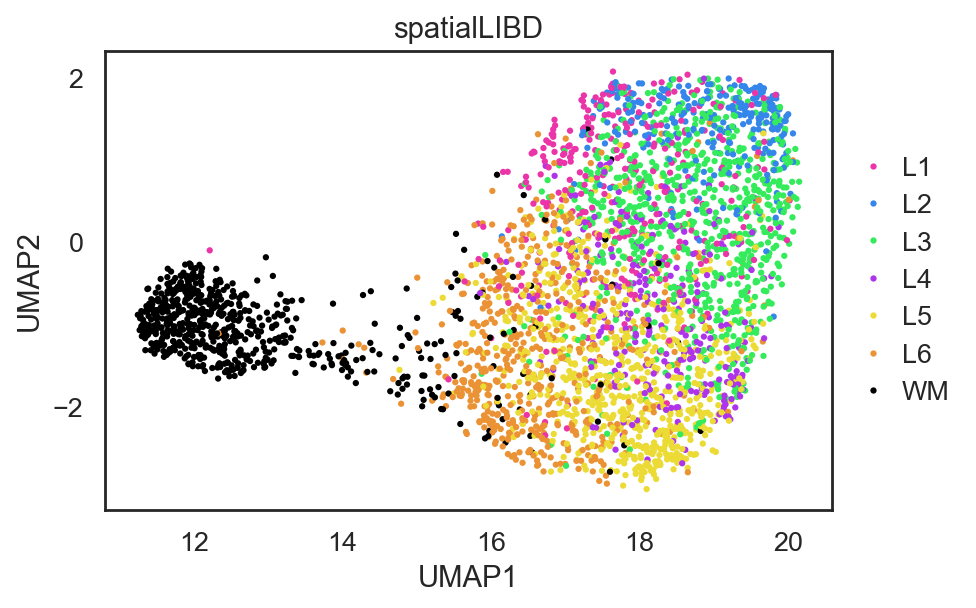

In [319]:
si.pl.umap(
    adata_C,color=['spatialLIBD'],
    dict_palette={'spatialLIBD': palette_celltype},
    fig_size=(6,4),
    drawing_order='random'
)

## SIMBA Spatial only

```bash
! benchmarking/simba_spatial_only.sh
```